# **UR5 Control: Inverse Dynamics vs Sliding Mode Control**



## **1. Параметры эксперимента**

In [7]:
SIM_TIME = 10.0
KP_ID, KD_ID = 100, 20
LAMBDA_SMC = 10
K_SMC = 20
PHI_LIST = [0.2, 0.5, 1.0]
print("Parameters loaded.")

Parameters loaded.


## **2. Загрузка логов и таблица результатов**

In [8]:
import pandas as pd
df = pd.read_csv("tradeoff_results.csv")


## **3. Визуализация

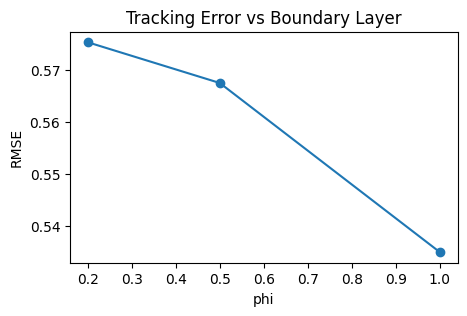

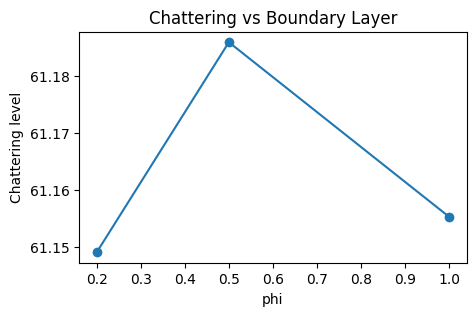

In [9]:
import matplotlib.pyplot as plt

phi = df[df['Controller'] == 'SMC']['phi']
rmse = df[df['Controller'] == 'SMC']['RMSE']
chat = df[df['Controller'] == 'SMC']['Chattering']

plt.figure(figsize=(5,3))
plt.plot(phi, rmse, marker='o')
plt.xlabel('phi')
plt.ylabel('RMSE')
plt.title('Tracking Error vs Boundary Layer')
plt.show()

plt.figure(figsize=(5,3))
plt.plot(phi, chat, marker='o')
plt.xlabel('phi')
plt.ylabel('Chattering level')
plt.title('Chattering vs Boundary Layer')
plt.show()

In [10]:
from IPython.display import Video, display

print("Inverse Dynamics:")
display(Video("logs/videos/ID.mp4", embed=True))

for phi in [0.2, 0.5, 1.0]:
    print(f"SMC (phi = {phi}):")
    display(Video(f"logs/videos/SMC_phi_{phi}.mp4", embed=True))

Inverse Dynamics:


SMC (phi = 0.2):


SMC (phi = 0.5):


SMC (phi = 1.0):


## **4. Сравнение результатов**

| Метод | Поведение |
|-------|------------|
| ID | без шумов, но хуже точность слежения |
| SMC с малым φ | лучшая точность, сильный чаттеринг |
| SMC с большим φ | гладкое управление, но точность ниже |

Среди рассмотренных параметров наиболее оптимально значение `φ ≈ 0.5 – 1.0` — чаттеринг снижается, RMSE остаётся приемлемым.

